**@Author 
Ahmad Fajar Tatang
Master Student FCIT KAU**

In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from cartopy import crs as ccrs
import contextily as ctx

**Read all shapefile**

In [2]:
maps = gpd.read_file('/Users/ahmadfajar/Masters/Computer Science/Special/geopandas-tutorial/gadm36_SAU_shp')
places = gpd.read_file(r'/Users/ahmadfajar/Masters/Computer Science/Special/geopandas-tutorial/places')
building = gpd.read_file(r'/Users/ahmadfajar/Masters/Computer Science/Special/geopandas-tutorial/building')
roads = gpd.read_file(r'/Users/ahmadfajar/Masters/Computer Science/Special/roads')
capital = gpd.read_file(r'/Users/ahmadfajar/Masters/Computer Science/Special/capital')
saudiAdministrative = gpd.read_file(r'/Users/ahmadfajar/Masters/Computer Science/Special/sau_adm1')

**Show Saudi Arabia General Maps**

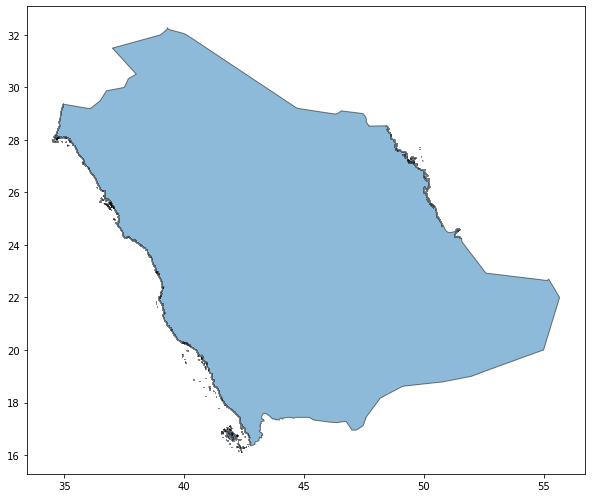

In [3]:
ax = maps.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [4]:
maps = maps.to_crs(epsg=3857)

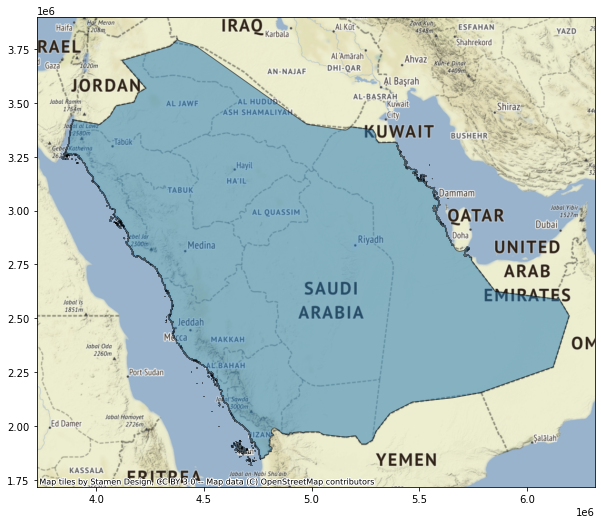

In [5]:
ax = maps.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

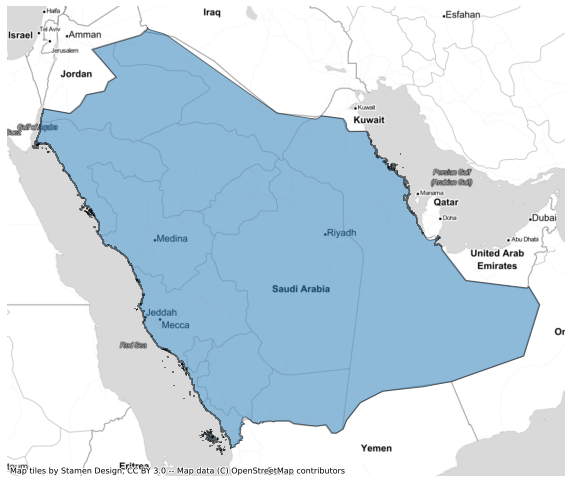

In [6]:
ax = maps.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

show places

<AxesSubplot:>

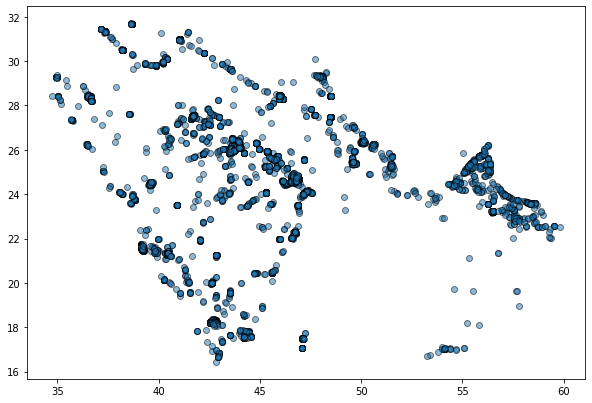

In [7]:
places.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

show building

<AxesSubplot:>

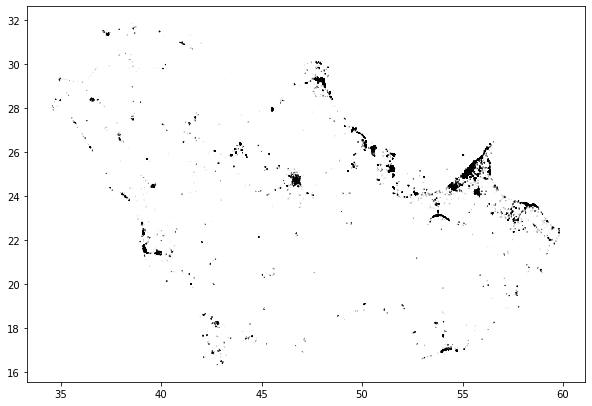

In [8]:
building.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

show roads

<AxesSubplot:>

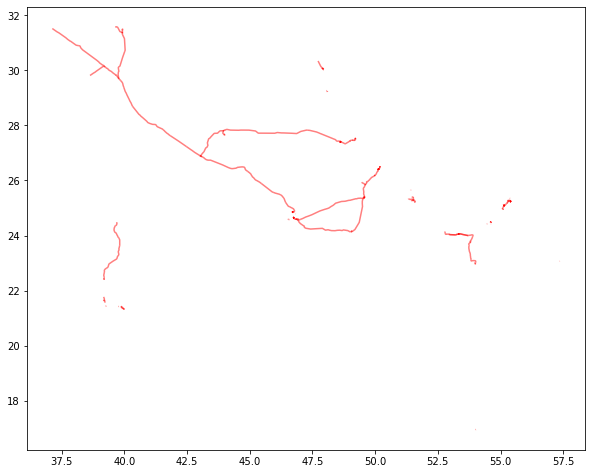

In [9]:
roads.plot(figsize=(10, 10), alpha=0.5, edgecolor='red')

<AxesSubplot:>

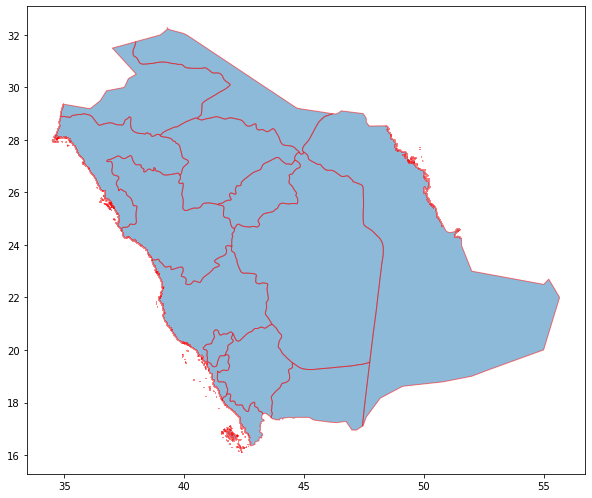

In [10]:
saudiAdministrative.plot(figsize=(10, 10), alpha=0.5, edgecolor='red')

<AxesSubplot:>

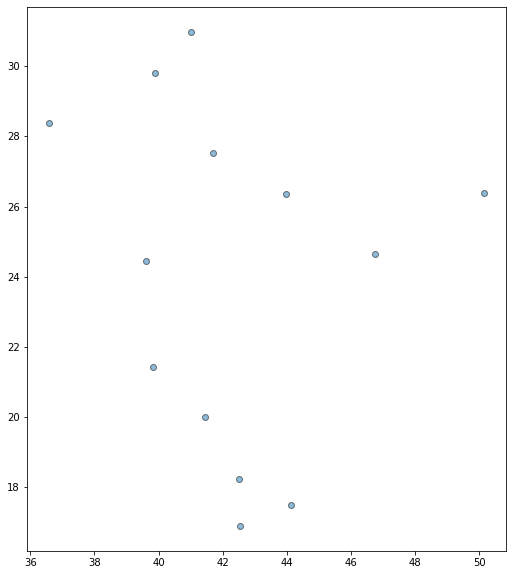

In [11]:
capital.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [12]:
saudiAdministrative.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,200,SAU,Saudi Arabia,1,`Asir,SA.AS,0,None,Emirate|Mintaqah,Region,None,Asir|Aseer|Assyear,"POLYGON ((43.28667 17.56099, 43.27166 17.58139..."
1,200,SAU,Saudi Arabia,2,Al Bahah,SA.BA,0,None,Emirate|Mintaqah,Region,None,Baha,"POLYGON ((41.69847 19.79686, 41.69778 19.79305..."
2,200,SAU,Saudi Arabia,3,Al Hudud ash Shamaliyah,SA.HS,0,None,Emirate|Mintaqah,Region,None,Northern Frontier,"POLYGON ((46.20728 28.99589, 46.14702 28.97731..."
3,200,SAU,Saudi Arabia,4,Al Jawf,SA.JF,0,None,Emirate|Mintaqah,Region,None,JawfAl Joaf|Al-Jouf|Jowf,"MULTIPOLYGON (((34.87680 29.11597, 34.87680 29..."
4,200,SAU,Saudi Arabia,5,Al Madinah,SA.MD,0,None,Emirate|Mintaqah,Region,None,Madinah|Al Madinah al Munawwarah|Monwarah|Medi...,"MULTIPOLYGON (((38.31958 23.89542, 38.31958 23..."


In [13]:
admAndCapital = gpd.GeoDataFrame(pd.concat([saudiAdministrative,capital]))

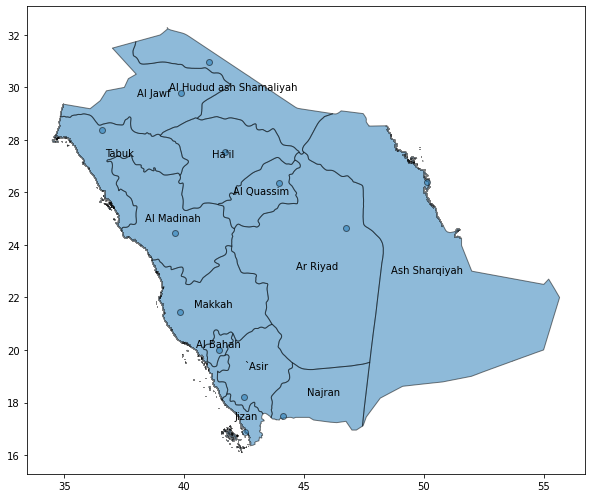

In [14]:
ax = admAndCapital.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
saudiAdministrative.apply(lambda x: ax.annotate(text=x.NAME_1, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

Join cities and places

In [15]:
gdf = gpd.GeoDataFrame(pd.concat([places, saudiAdministrative]))

<AxesSubplot:>

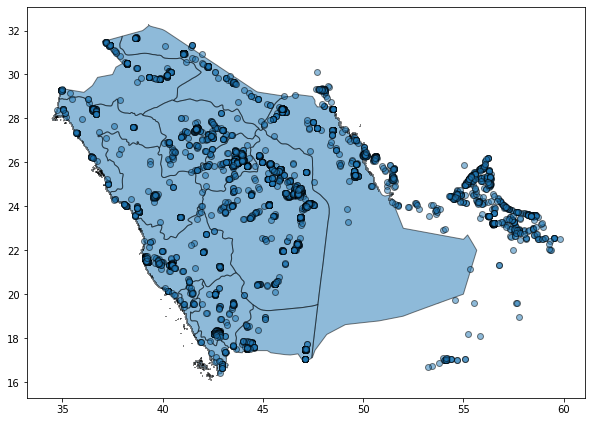

In [16]:
gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Join cities, road, and building

In [17]:
crb = gpd.GeoDataFrame(pd.concat([saudiAdministrative, roads, building]))

<AxesSubplot:>

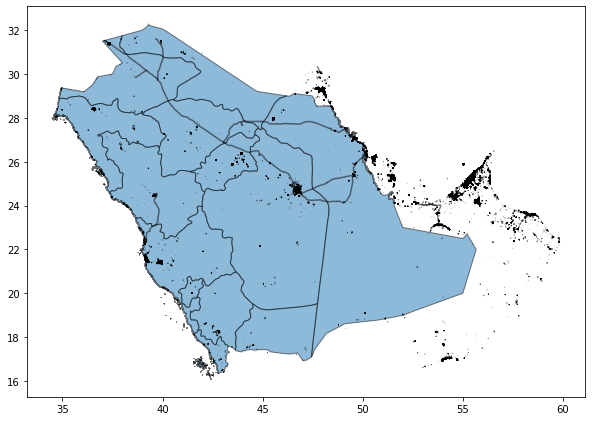

In [18]:
crb.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

<AxesSubplot:>

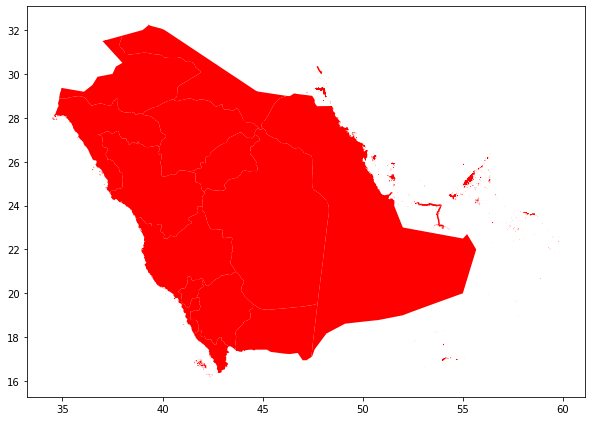

In [19]:
crb.plot(figsize=(10, 10), marker='o', color='red', markersize=5)

<AxesSubplot:>

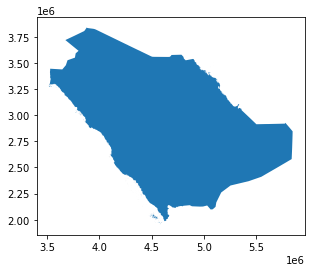

In [20]:
# Define the CartoPy CRS object.
crs_saudi = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4_saudi = crs_saudi.proj4_init
df_ae_saudi = maps.to_crs(crs_proj4_saudi)

# Here's what the plot looks like in GeoPandas
df_ae_saudi.plot()

In [21]:
path = gpd.datasets.get_path('naturalearth_lowres')
df = gpd.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

<AxesSubplot:>

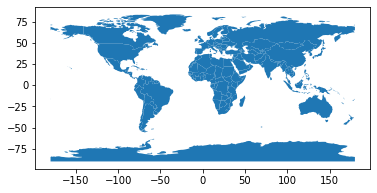

In [22]:
df.plot()

<AxesSubplot:>

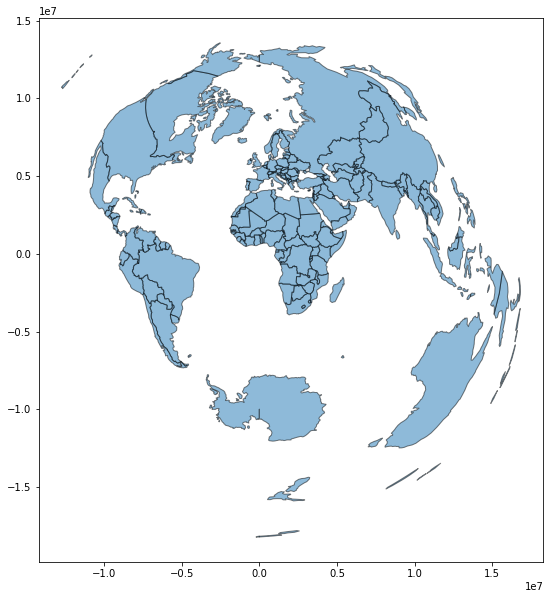

In [29]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

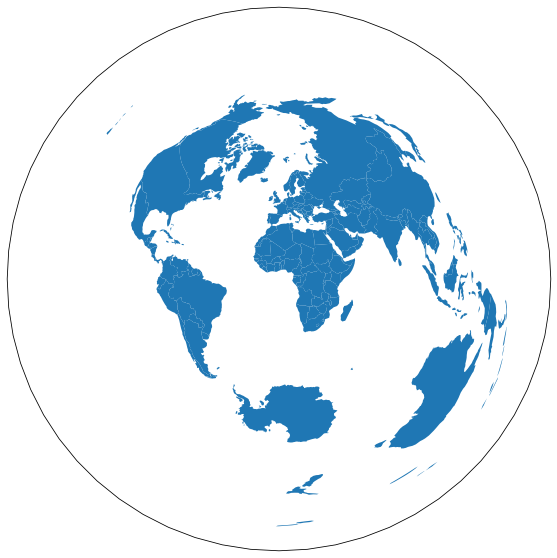

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection': crs},figsize=(10, 10), edgecolor='k')
ax.add_geometries(df_ae['geometry'], crs=crs)

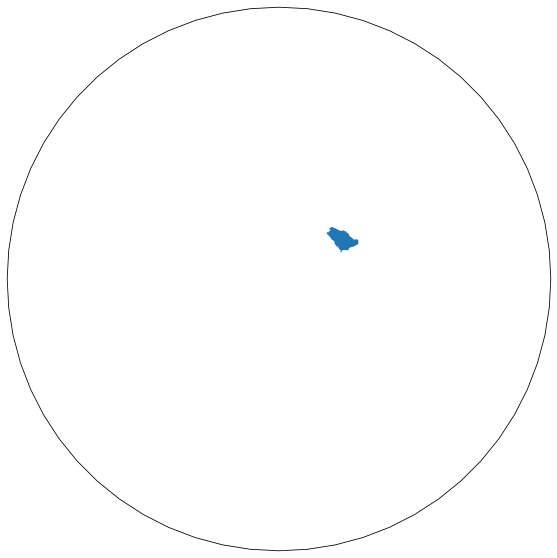

In [34]:
fig, ax = plt.subplots(subplot_kw={'projection': crs},figsize=(10, 10), edgecolor='k')
ax.add_geometries(df_ae_saudi['geometry'], crs=crs_saudi)

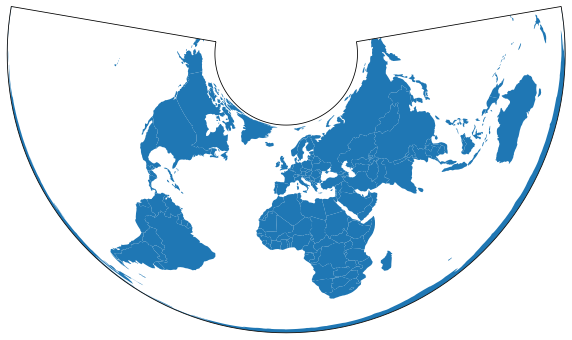

In [35]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [crs_new.project_geometry(ii, src_crs=crs)
                  for ii in df_ae['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new},figsize=(10, 10), edgecolor='k')
ax.add_geometries(new_geometries, crs=crs_new)

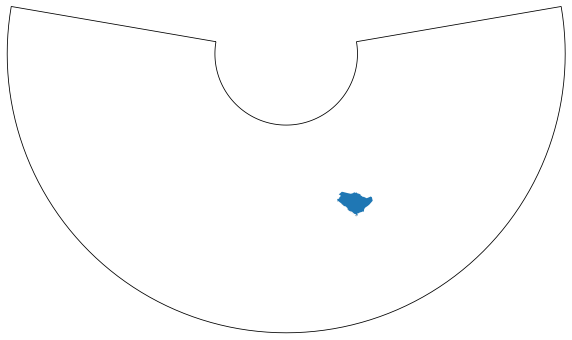

In [36]:
crs_new_saudi = ccrs.AlbersEqualArea()
new_geometries_saudi = [crs_new_saudi.project_geometry(ii, src_crs=crs_saudi)
                  for ii in df_ae_saudi['geometry'].values]

fig, ax = plt.subplots(subplot_kw={'projection': crs_new_saudi},figsize=(10, 10),edgecolor='k')
ax.add_geometries(new_geometries_saudi, crs=crs_new_saudi)